In [2]:
from snAPI.Main import *
import matplotlib.pyplot as plt
import os
import pandas as pd

In [3]:
sn=snAPI()

In [7]:
filename='../../Acquisition2/Data/Trial/PTU_0.00_0.00.ptu'
os.listdir(filename)

NotADirectoryError: [WinError 267] El nombre del directorio no es válido: '../../Acquisition2/Data/Trial/PTU_0.00_0.00.ptu'

In [8]:
sn.getFileDevice(filename)
sn.initDevice(MeasMode.T3)
t_resol=sn.deviceConfig['Resolution']/1000 #in ns
sn.raw.measure()
data = sn.raw.getData()
channels=sn.raw.channel(data)
dTimes=sn.raw.dTime_T3(data)[np.where(channels!=64)]*t_resol
dataChannels=channels[np.where(channels!=64)]
sn.unfold.measure()
absTimes=sn.unfold.getData()[0]/1e3 # in ns
df=pd.DataFrame(np.array([dTimes,absTimes,dataChannels]).T,columns=['dTimes','absTimes','Channels'])
sn.closeDevice()

In [9]:
df

,dTimes,absTimes,Channels
0,12.735,4.532876e+07,3.0
1,27.767,6.002642e+07,3.0
2,17.658,4.261248e+08,3.0


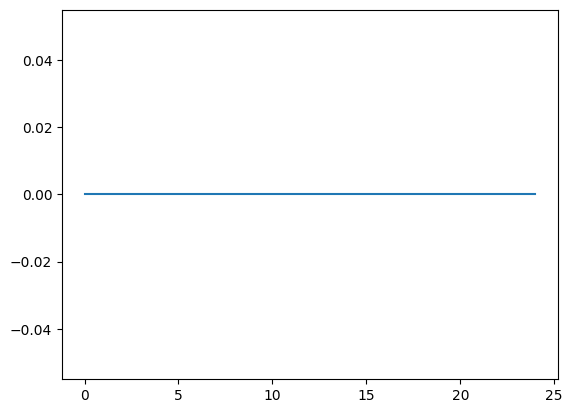

In [6]:
plt.plot(sn.raw.markers(data)[2][0:1000])